In [56]:
import random
import networkx
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import time 
import numpy
import xlwt
import math

In [2]:
def find(elem, arrays):
    for array in arrays:
        if elem in array:
            return arrays.index(array)
    return -1

In [3]:
class Tree(object):
    
    def __init__(self, size):
        self.nodes = range(size)
        self.edges = []
        self.pos_edges = []
        for i in self.nodes:
            for j in self.nodes:
                if i != j:
                    self.pos_edges.append([i, j])
        self.matrix = []
        for s in range(len(self.nodes)):
            self.matrix.append([s] * len(self.nodes))
        for s in range(len(self.nodes)):
            for t in range(len(self.nodes)):
                self.matrix[s][t] = 0
        self.svyaznost = []
        
    def step(self, func, stepen = []):
        #print(self.pos_edges)
        edge = self.pos_edges[random.randint(0, len(self.pos_edges) - 1)]
        self.edges.append(edge) 
        self.matrix[edge[0]][edge[1]] = 1
        self.matrix[edge[1]][edge[0]] = 1
        self.pos_edges.remove(edge)
        v0 = find(edge[0], self.svyaznost)
        v1 = find(edge[1], self.svyaznost)
        if v0 == -1:
            if v1 == -1:
                self.svyaznost.append([edge[0], edge[1]])
            else:
                self.svyaznost[v1].append(edge[0])
        elif v1 == -1:
            self.svyaznost[v0].append(edge[1])
        else:
            first = min(v0, v1)
            second = max(v0, v1)
            nov = self.svyaznost[first] + self.svyaznost[second]
            self.svyaznost = self.svyaznost[:first] + self.svyaznost[first + 1:second] + self.svyaznost[second + 1:] + [nov]
        self.pos_edges = func(self.matrix, self.svyaznost, stepen)
        
    def draw(self):
        g = networkx.Graph(directed=False)
        for node in self.nodes:
            g.add_node(node)
        for edge in self.edges:
            g.add_edge(edge[0], edge[1])
        
        plt.xkcd()
        k = dict(nx.degree(g))
        plt.figure(1, figsize= (10,7))
        coord = nx.spring_layout(g, k = 0.3, iterations = 20)
        nx.draw_networkx(g, 
                 pos=coord,
                 nodelist=list(k.keys()),
                 node_size = [300 for d in list(k.values())],
                 #node_color=list(k.values()),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 width = 0.5,
                 with_labels=True)
        plt.show()

In [4]:
def all_func(matrix, svyznost, stepen):
    pos_matrix = []
    for s in range(len(matrix)):
        pos_matrix.append([s] * len(matrix))
    for s in range(len(matrix)):
        for t in range(len(matrix)):
            pos_matrix[s][t] = 0
    for komponent in svyznost:
        for v0 in komponent:
            for v1 in komponent:
                #print(v0, v1)
                #print(pos_matrix, matrix)
                pos_matrix[v0][v1] += 2 * matrix[v0][v1] - 1
    pos_edges = []
    for s in range(len(matrix)):
        for t in range(s):
            if pos_matrix[s][t] == 0:
                pos_edges.append([s, t])
    return pos_edges

In [5]:
def izol(graph):
    flag = False
    for node_spis in graph.matrix:
        if not 1 in node_spis:
            flag = True
            break
    return flag     

In [6]:
zapusk = range(1, 1001)
result10 = []

for i in tqdm(zapusk):
    example = Tree(10)
    for j in range(9):
        example.step(all_func)
        if not izol(example):
            result10.append(j + 1) 
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1745.92it/s]


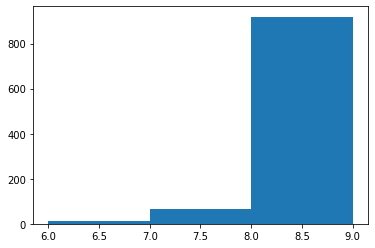

In [9]:
plt.hist(result10, bins = max(result10) - min(result10))
plt.show()

In [10]:
zapusk = range(1, 1001)
result100 = []

for i in tqdm(zapusk):
    example = Tree(100)
    for j in range(99 * 50):
        #print(len(example.matrix))
        example.step(all_func)
        if not izol(example):
            result100.append(j)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:13<00:00,  2.03it/s]


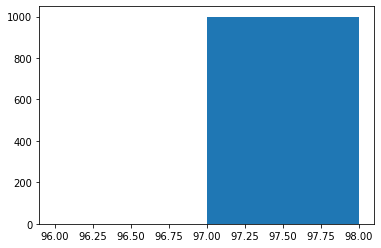

In [11]:
plt.hist(result100, bins = (max(result100) - min(result100)))
plt.show()

In [6]:
def sorting(array1, array2):
    for i in range(len(array1) - 1):
        for j in range(len(array1) - i - 1):
            if array1[j] < array1[j+1]:
                array1[j], array1[j+1] = array1[j+1], array1[j]
                array2[j], array2[j+1] = array2[j+1], array2[j]
    return array1, array2

In [7]:
def stepennaya(matrix, svyaznost, stepen):
    pos_matrix = []
    for s in range(len(matrix)):
        pos_matrix.append([s] * len(matrix))
    for s in range(len(matrix)):
        for t in range(len(matrix)):
            pos_matrix[s][t] = 0
    for komponent in svyaznost:
        for v0 in komponent:
            for v1 in komponent:
                #print(v0, v1)
                #print(pos_matrix, matrix)
                pos_matrix[v0][v1] += 2 * matrix[v0][v1] - 1
    
    tekush_step = [0] * len(matrix)
    for s in range(len(matrix)):
        tekush_step[s] = sum(matrix[s])
    
    nodes = []
    for i in range(len(matrix)):
        nodes.append(i)
    
    tekush_step, nodes = sorting(tekush_step, nodes)
    
    for i in range(len(nodes)):
        if stepen[i] == tekush_step[i]:
            for j in range(len(nodes)):
                pos_matrix[j][nodes[i]] = -1
                pos_matrix[nodes[i]][j] = -1
    
    pos_edges = []
    for s in range(len(matrix)):
        for t in range(s):
            if pos_matrix[s][t] == 0:
                pos_edges.append([s, t])
    return pos_edges

In [14]:
example = Tree(12)
stepeni = [4, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1]
for j in range(11):
    try:
        example.step(stepennaya, stepeni)
    except ValueError:
        print('neudacha')
    #print(example.pos_edges)
print(example.edges)
#print(example.matrix)

[[10, 2], [5, 0], [8, 3], [9, 8], [8, 6], [8, 5], [7, 0], [5, 2], [1, 0], [11, 0], [4, 1]]


In [8]:
def find_komponent(tree_matrix, i):
    nodes = [i]
    obrabot = []
    num = 0
    while nodes != obrabot:
        for i in range(len(tree_matrix)):
            if tree_matrix[nodes[num]][i] == 1 and i not in nodes:
                nodes.append(i)
        obrabot.append(nodes[num])
        num += 1
    return nodes

In [16]:
find_komponent(example.matrix, 0)

[0, 1, 5, 7, 11, 4, 2, 8, 10, 3, 6, 9]

In [9]:
def nezavisimost(tree_matrix):
    matrix = []
    for s in range(len(tree_matrix)):
        matrix.append([s] * len(tree_matrix))
    for s in range(len(matrix)):
        for t in range(len(matrix)):
            #print(s, t)
            matrix[s][t] = tree_matrix[s][t]
    vershin = 0
    #if len(matrix) != 25:
    #    print(matrix)
    for i in range(len(matrix)):
        if sum(matrix[i]) != 0:
            vershin += 1
            if vershin == 1:
                first_ver = i
    if vershin == 0:
        return []
    if vershin == 1 or vershin == 2:
        return [first_ver]
    nezav = []
    nedos = []
    for i in range(len(matrix)):
        if sum(matrix[i]) == 1:
            nezav.append(i)
    for versh in nezav:
        for j in range(len(matrix)):
            if matrix[versh][j] == 1:
                nedos.append(j)
                for k in range(len(matrix)):
                    matrix[j][k] = 0
                    matrix[k][j] = 0
                    
    obrabot = []
    for i in range(len(matrix)):
        new_matrix = []
        if i not in nezav and i not in nedos and i not in obrabot:
            if sum(matrix[i]) == 0:
                nezav.append(i)
            else:
                nodes = find_komponent(matrix, i)
                for s in range(len(nodes)):
                    new_matrix.append([s] * len(nodes))
                    for t in range(len(nodes)):
                        new_matrix[s][t] = 0
                for versh1 in nodes:
                    obrabot.append(versh1)
                    for versh2 in nodes:
                        new_matrix[nodes.index(versh1)][nodes.index(versh2)] = matrix[versh1][versh2]
     #           print(len(new_matrix))
                #print(new_matrix)
                code = nezavisimost(new_matrix)
                for i in code:
                    nezav.append(nodes[i])
            
    return nezav

In [33]:
zapusk = range(1, 1001)
stepeni = [7, 6, 5, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nezavis = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nezavis.append(len(nezavisimost(example.matrix)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [53:54<00:00,  3.23s/it]


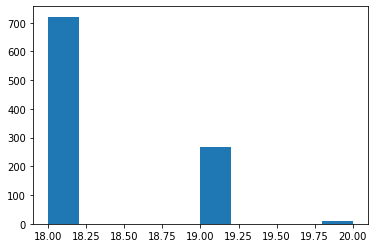

In [34]:
plt.hist(nezavis)
plt.show()

In [47]:
zapusk = range(1, 1001)
stepeni = [3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nezavis = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nezavis.append(len(nezavisimost(example.matrix)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.37it/s]


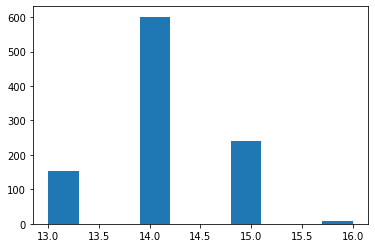

In [48]:
plt.hist(nezavis)
plt.show()

In [18]:
zapusk = range(1, 1001)
stepeni = [5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nezavis = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nezavis.append(len(nezavisimost(example.matrix)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.34it/s]


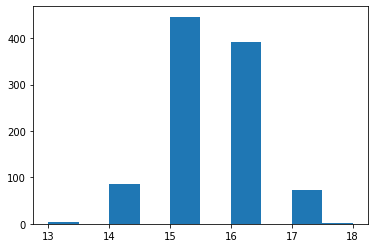

In [19]:
plt.hist(nezavis)
plt.show()

In [23]:
zapusk = range(1, 1001)
stepeni = [4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nezavis = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nezavis.append(len(nezavisimost(example.matrix)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.54it/s]


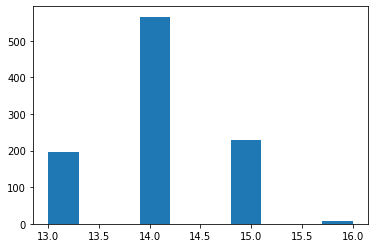

In [24]:
plt.hist(nezavis)
plt.show()

In [25]:
zapusk = range(1, 1001)
stepeni = [5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nezavis = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nezavis.append(len(nezavisimost(example.matrix)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.06it/s]


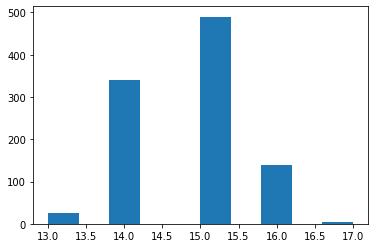

In [26]:
plt.hist(nezavis)
plt.show()

In [10]:
def dominirovanie(tree_matrix, flags):
    matrix = []
    reber = 0
    for s in range(len(tree_matrix)):
        matrix.append([s] * len(tree_matrix))
        reber += sum(tree_matrix[s])
    reber = reber/2
    if reber == 0:
        return []
    if reber == 1:
        kands = []
        for i in range(len(tree_matrix)):
            if sum(tree_matrix[i]) == 1:
                kands.append(i)
        if kands[0] in flags and kands[1] in flags:
            return[]
        return [kands[0]]
    for s in range(len(matrix)):
        for t in range(len(matrix)):
            matrix[s][t] = tree_matrix[s][t]
    
    domin = []
    lists = []
    for i in range(len(matrix)):
        if sum(matrix[i]) == 1:
            lists.append(i)
            for j in range(len(matrix)):
                if matrix[i][j] == 1 and j not in domin:
                    domin.append(j)
    #print(domin)
    #print(lists)
    for versh in domin:
        for j in range(len(matrix)):
            if matrix[versh][j] == 1:
                if j not in flags:
                    flags.append(j)
                if sum(matrix[j]) > 2:
                    matrix[j][versh] = 0
                    matrix[versh][j] = 0
                else:
                    for k in range(len(matrix)):
                        matrix[j][k] = 0
                        matrix[k][j] = 0
                        
    obrabot = []
    #print(flags, domin)
    for i in range(len(matrix)):
        new_matrix = []
        if i not in domin and i not in lists and i not in obrabot:
            if sum(matrix[i]) == 0 and i not in flags:
                domin.append(i)
            elif sum(matrix[i]) == 0 and i in flags:
                obrabot.append(i)
            elif sum(matrix[i]) == 1 and i in flags:
                obrabot.append(i)
            else:
                nodes = find_komponent(matrix, i)
                flag_komponent = []
                for versh in nodes:
                    if versh in flags:
                        flag_komponent.append(nodes.index(versh))
                for s in range(len(nodes)):
                    new_matrix.append([s] * len(nodes))
                    for t in range(len(nodes)):
                        new_matrix[s][t] = 0
                for versh1 in nodes:
                    obrabot.append(versh1)
                    for versh2 in nodes:
                        new_matrix[nodes.index(versh1)][nodes.index(versh2)] = matrix[versh1][versh2]
                #print(new_matrix, nodes)       
                code = dominirovanie(new_matrix, flag_komponent)
                #print(code)
                for i in code:
                    domin.append(nodes[i])
                    
    return domin

In [34]:
zapusk = range(1, 1001)
stepeni = [7, 6, 5, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir6 = []
nezavis6 = []
domnez6 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir6.append(dom)
        nezavis6.append(nez)
        domnez6.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [42:19<00:00,  2.54s/it]


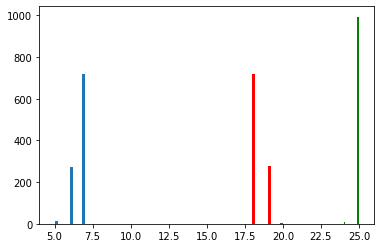

In [36]:
plt.hist(dominir6)
plt.hist(nezavis6, color = 'red')
plt.hist(domnez6, color = 'green')
plt.show()

In [37]:
zapusk = range(1, 1001)
stepeni = [3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir7 = []
nezavis7 = []
domnez7 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir7.append(dom)
        nezavis7.append(nez)
        domnez7.append(dom + nez)
        

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.17it/s]


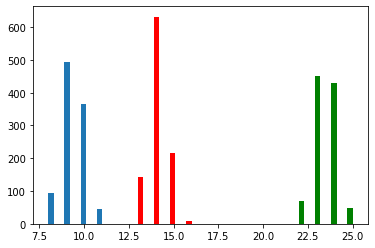

In [38]:
plt.hist(dominir7)
plt.hist(nezavis7, color = 'red')
plt.hist(domnez7, color = 'green')
plt.show()

In [39]:
zapusk = range(1, 1001)
stepeni = [5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir8 = []
nezavis8 = []
domnez8 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir8.append(dom)
        nezavis8.append(nez)
        domnez8.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.00it/s]


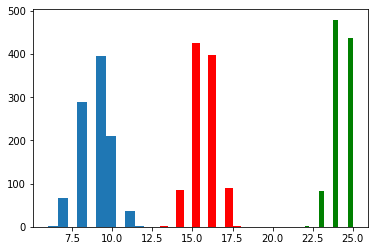

In [40]:
plt.hist(dominir8)
plt.hist(nezavis8, color = 'red')
plt.hist(domnez8, color = 'green')
plt.show()

In [41]:
zapusk = range(1, 1001)
stepeni = [4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir9 = []
nezavis9 = []
domnez9 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir9.append(dom)
        nezavis9.append(nez)
        domnez9.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.75it/s]


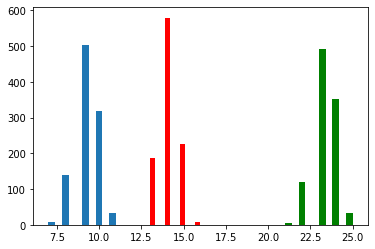

In [42]:
plt.hist(dominir9)
plt.hist(nezavis9, color = 'red')
plt.hist(domnez9, color = 'green')
plt.show()

In [43]:
zapusk = range(1, 1001)
stepeni = [5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir10 = []
nezavis10 = []
domnez10 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir10.append(dom)
        nezavis10.append(nez)
        domnez10.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.14it/s]


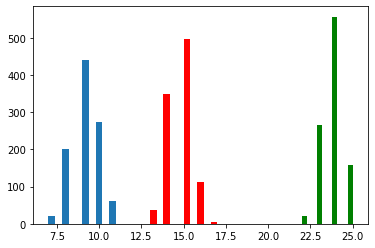

In [44]:
plt.hist(dominir10)
plt.hist(nezavis10, color = 'red')
plt.hist(domnez10, color = 'green')
plt.show()

In [11]:
zapusk = range(1, 1001)
stepeni = [6, 6, 5, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir1 = []
nezavis1 = []
domnez1 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir1.append(dom)
        nezavis1.append(nez)
        domnez1.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [47:51<00:00,  2.87s/it]


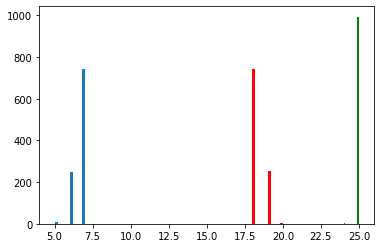

In [12]:
plt.hist(dominir1)
plt.hist(nezavis1, color = 'red')
plt.hist(domnez1, color = 'green')
plt.show()

In [13]:
zapusk = range(1, 1001)
stepeni = [5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir2 = []
nezavis2 = []
domnez2 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(26)
    flag = True
    while flag:
        example = Tree(26)
        for j in range(25):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir2.append(dom)
        nezavis2.append(nez)
        domnez2.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.57it/s]


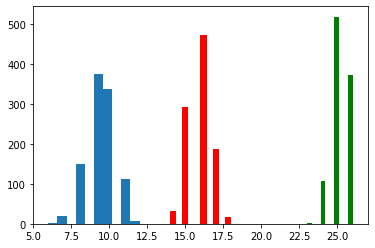

In [14]:
plt.hist(dominir2)
plt.hist(nezavis2, color = 'red')
plt.hist(domnez2, color = 'green')
plt.show()

In [15]:
zapusk = range(1, 1001)
stepeni = [4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir3 = []
nezavis3 = []
domnez3 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(26)
    flag = True
    while flag:
        example = Tree(26)
        for j in range(25):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir3.append(dom)
        nezavis3.append(nez)
        domnez3.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:31<00:00, 10.95it/s]


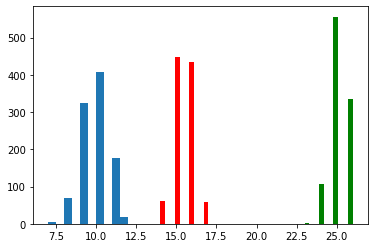

In [16]:
plt.hist(dominir3)
plt.hist(nezavis3, color = 'red')
plt.hist(domnez3, color = 'green')
plt.show()

In [46]:
zapusk = range(1, 1001)
stepeni = [3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir4 = []
nezavis4 = []
domnez4 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir4.append(dom)
        nezavis4.append(nez)
        domnez4.append(dom + nez)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.77it/s]


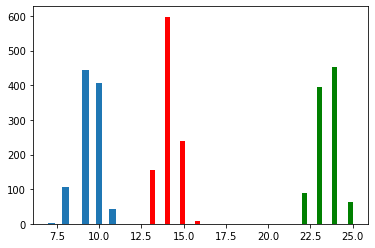

In [47]:
plt.hist(dominir4)
plt.hist(nezavis4, color = 'red')
plt.hist(domnez4, color = 'green')
plt.show()

In [20]:
zapusk = range(1, 1001)
stepeni = [7, 7, 7, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dominir5 = []
nezavis5 = []
domnez5 = []
flag = True

for i in tqdm(zapusk):
    example = Tree(25)
    flag = True
    while flag:
        example = Tree(25)
        for j in range(24):
            try:
                example.step(stepennaya, stepeni)
                flag = False
            except ValueError:
                flag = True
    if not flag:
        nez = len(nezavisimost(example.matrix))
        dom = len(dominirovanie(example.matrix, []))
        dominir5.append(dom)
        nezavis5.append(nez)
        domnez5.append(dom + nez)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [13:10:31<00:00, 47.43s/it]


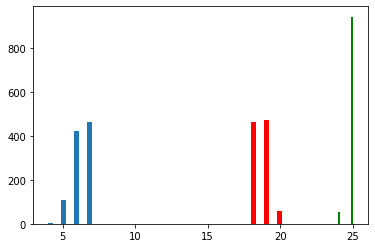

In [22]:
plt.hist(dominir5)
plt.hist(nezavis5, color = 'red')
plt.hist(domnez5, color = 'green')
plt.show()

In [23]:
zapusk = range(1, 1001)
dominir25 = []
nezavis25 = []
domnez25 = []

for i in tqdm(zapusk):
    example = Tree(25)
    for j in range(24):
        example.step(all_func)
    
    nez = len(nezavisimost(example.matrix))
    dom = len(dominirovanie(example.matrix, []))
    dominir25.append(dom)
    nezavis25.append(nez)
    domnez25.append(dom + nez)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.47it/s]


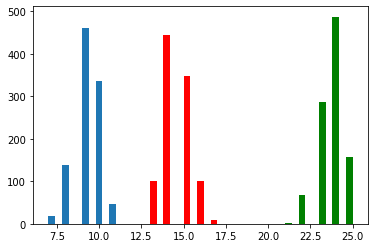

In [25]:
plt.hist(dominir25)
plt.hist(nezavis25, color = 'red')
plt.hist(domnez25, color = 'green')
plt.show()

In [32]:
zapusk = range(1, 1001)
result_tree_10 = []

for i in tqdm(zapusk):
    example = Tree(10)
    for j in range(9):
        example.step(all_func)
        
        if not izol(example):
            if j != 8:
                result_tree_10.append(1)
            else:
                result_tree_10.append(0)
            break

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4074.39it/s]


In [28]:
zapusk = range(1, 1001)
result_tree_25 = []

for i in tqdm(zapusk):
    example = Tree(25)
    for j in range(24):
        example.step(all_func)
        
        if not izol(example):
            if j != 23:
                result_tree_25.append(1)
            else:
                result_tree_25.append(0)
            break

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.59it/s]


In [29]:
zapusk = range(1, 1001)
result_tree_50 = []

for i in tqdm(zapusk):
    example = Tree(50)
    for j in range(49):
        example.step(all_func)
        
        if not izol(example):
            if j != 48:
                result_tree_50.append(1)
            else:
                result_tree_50.append(0)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 34.51it/s]


In [30]:
zapusk = range(1, 1001)
result_tree_100 = []

for i in tqdm(zapusk):
    example = Tree(100)
    for j in range(99):
        example.step(all_func)
        
        if not izol(example):
            if j != 98:
                result_tree_100.append(1)
            else:
                result_tree_100.append(0)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:37<00:00,  2.97it/s]


In [31]:
zapusk = range(1, 1001)
result_tree_200 = []

for i in tqdm(zapusk):
    example = Tree(200)
    for j in range(199):
        example.step(all_func)
        
        if not izol(example):
            if j != 198:
                result_tree_200.append(1)
            else:
                result_tree_200.append(0)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [47:14<00:00,  2.83s/it]


In [45]:
print(1 - sum(result_tree_10)/len(result_tree_10))
print(1 - sum(result_tree_25)/len(result_tree_25))
print(1 - sum(result_tree_50)/len(result_tree_50))
print(1 - sum(result_tree_100)/len(result_tree_100))
print(1 - sum(result_tree_200)/len(result_tree_200))

0.749
0.85
0.9339999999999999
0.96
0.973


In [48]:
domnez25.count(25)

156

In [55]:
# Import `xlwt` 
import xlwt

# Initialize a workbook 
book = xlwt.Workbook(encoding="utf-8")

# Add a sheet to the workbook 
sheettree = book.add_sheet("tree")
sheet1 = book.add_sheet("step1")
sheet2 = book.add_sheet("step2") 
sheet3 = book.add_sheet("step3") 
sheet4 = book.add_sheet("step4") 
sheet5 = book.add_sheet("step5")
sheet6 = book.add_sheet("step6")
sheet7 = book.add_sheet("step7") 
sheet8 = book.add_sheet("step8") 
sheet9 = book.add_sheet("step9") 
sheet10 = book.add_sheet("step10")

# Write to the sheet of the workbook
for i in range(1000):
    sheettree.write(i, 0, dominir25[i])
    sheettree.write(i, 1, nezavis25[i])
    sheettree.write(i, 2, domnez25[i])
    sheet1.write(i, 0, dominir1[i])
    sheet1.write(i, 1, nezavis1[i])
    sheet1.write(i, 2, domnez1[i])    
    sheet2.write(i, 0, dominir2[i])
    sheet2.write(i, 1, nezavis2[i])
    sheet2.write(i, 2, domnez2[i])
    sheet3.write(i, 0, dominir3[i])
    sheet3.write(i, 1, nezavis3[i])
    sheet3.write(i, 2, domnez3[i])
    sheet4.write(i, 0, dominir4[i])
    sheet4.write(i, 1, nezavis4[i])
    sheet4.write(i, 2, domnez4[i])
    sheet5.write(i, 0, dominir5[i])
    sheet5.write(i, 1, nezavis5[i])
    sheet5.write(i, 2, domnez5[i])
    sheet6.write(i, 0, dominir6[i])
    sheet6.write(i, 1, nezavis6[i])
    sheet6.write(i, 2, domnez6[i])
    sheet7.write(i, 0, dominir7[i])
    sheet7.write(i, 1, nezavis7[i])
    sheet7.write(i, 2, domnez7[i])
    sheet8.write(i, 0, dominir8[i])
    sheet8.write(i, 1, nezavis8[i])
    sheet8.write(i, 2, domnez8[i])
    sheet9.write(i, 0, dominir9[i])
    sheet9.write(i, 1, nezavis9[i])
    sheet9.write(i, 2, domnez9[i])
    sheet10.write(i, 0, dominir10[i])
    sheet10.write(i, 1, nezavis10[i])
    sheet10.write(i, 2, domnez10[i])
    

    
    
# Save the workbook 
book.save("Trees.xls")

In [120]:
def granitsy(stepeni):
    l = stepeni.count(1)
    min_nez = max(l, math.ceil(len(stepeni)/2))
    step_non_list = stepeni[:len(stepeni) - l]
    a = 0
    sum_s = 0
    while sum_s <= len(step_non_list):
        a += 1
        sum_s += step_non_list[len(step_non_list) - a]
        
    max_nez = l + a - 1
    
    sl = 0
    sum_s = 0
    while sum_s < len(stepeni):
        sum_s += 1 + step_non_list[sl]
        sl += 1
        
    lv = 0
    sum_s = 0
    while sum_s < l:
        sum_s += step_non_list[lv] - 1
        lv += 1
        
    #print(sl, lv)
    min_dom = max(sl, lv)
    max_dom = min(len(step_non_list), l + math.floor((len(step_non_list) - l)/3))
    return min_nez, max_nez, min_dom, max_dom

In [121]:
print(granitsy([6, 6, 5, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([7, 7, 7, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([7, 6, 5, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

(18, 20, 5, 7)
(13, 19, 6, 13)
(13, 18, 6, 13)
(13, 17, 7, 11)
(18, 21, 4, 7)
(18, 20, 4, 7)
(13, 17, 7, 11)
(13, 19, 5, 12)
(13, 17, 6, 11)
(13, 18, 6, 12)


In [119]:
print(granitsy([6, 6, 5, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([7, 7, 7, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(granitsy([7, 6, 5, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

4 5
(18, 20, 5, 7)
4 3
(18, 21, 4, 7)
4 4
(18, 20, 4, 7)


In [136]:
domnez8.count(25)

437

In [141]:
max(dominir8)

12

In [74]:
[5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1].count(1)

13

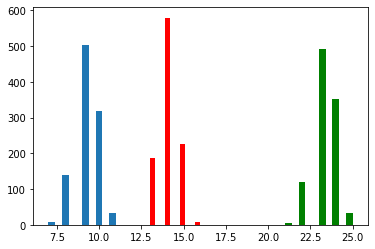

In [123]:
plt.hist(dominir9)
plt.hist(nezavis9, color = 'red')
plt.hist(domnez9, color = 'green')
plt.show()

In [84]:
print(granitsy([13, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

(13, 19, 2, 13)
